# Stacked Bar Chart 2016

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [20, 20]

## Data wrangling: 


In [3]:
# importing the data set with FECHA_PAGO as index, parse_date means we are using pandas' datetime function, datefirst adjusts for European date format
df = pd.read_csv('auto_debt.csv', sep=',', encoding='utf-8', index_col='FECHA_PAGO', parse_dates=True, dayfirst=True)
# put the dates in order
df = df.sort_values('FECHA_PAGO')
# add a new column called "Period" with the year-month format
df['Period'] = df.index.to_period(freq='M')
# We only want origen (PAO)
origen_df = df.groupby('MCC_TIPO_ORIGEN')
pao_df = origen_df.get_group('PAO')
# We only want tipo C (credito)
pao_tipo = pao_df.groupby('MCC_TIPO_MOVIMIENTO')
clean_df = pao_tipo.get_group('C')
# select only 2016
clean_df = clean_df['2016-01':'2016-12']

## Create a new df with only cuotas 10, 20, and 50

In [4]:
indexed = clean_df.set_index('Period')
cuota_group2 = indexed.groupby('OBN_CUOTA')

In [5]:
def df_three(self_one,self_two,self_three):
    """This function takes three numbers (the data frame numbers) and turns them into a new data frame with information about those cuotas."""
    global ten_df
    global twenty_df
    global fifty_df
    cuotas = [self_one, self_two, self_three]
    for i in cuotas:
        x = cuota_group2.get_group(i)
        name = str(i)
        name = 'Cuota_'+name[:2]
        x.rename(index=str, columns={"MCC_IMPORTE":name}, inplace=True)        
        x_series = x.groupby('Period').sum()
        x_series = x_series.iloc[:,:1]
        if i == 10.0:
            ten_df = pd.DataFrame(x_series)
        if i == 20.0:
            twenty_df = pd.DataFrame(x_series)
        if i == 50.0:
            fifty_df = pd.DataFrame(x_series)
    merge_three(ten_df,twenty_df,fifty_df) 

In [6]:
def merge_three(self1,self2,self3):
    global merged
    global merged_total
    global new_df
    merged = pd.merge(self1,self2, on='Period', how='outer')
    merged_total = pd.merge(merged,self3, on='Period', how='outer')
    new_df = merged_total.sort_index()

In [7]:
df_three(10.0,20.0,50.0)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


## Now we have a new data frame

In [8]:
new_df

,Cuota_10,Cuota_20,Cuota_50
Period,,,
2016-01,NaN,246.56,174.26
2016-03,103.08,NaN,NaN
2016-04,NaN,78297.80,62077.40
2016-05,638.34,NaN,NaN
2016-06,62.90,NaN,NaN
2016-07,34.30,NaN,575.64
2016-08,11958.86,10619.00,8551.20
2016-10,68766.60,61061.00,49039.20
2016-11,1553.67,NaN,509.06


# Making the chart

In [9]:
indx = new_df.index.astype(str).tolist()
# match the heights with 
bar10 = new_df.Cuota_10.fillna(0)
bar20 = new_df.Cuota_20.fillna(0)
bar50 = new_df.Cuota_50.fillna(0)

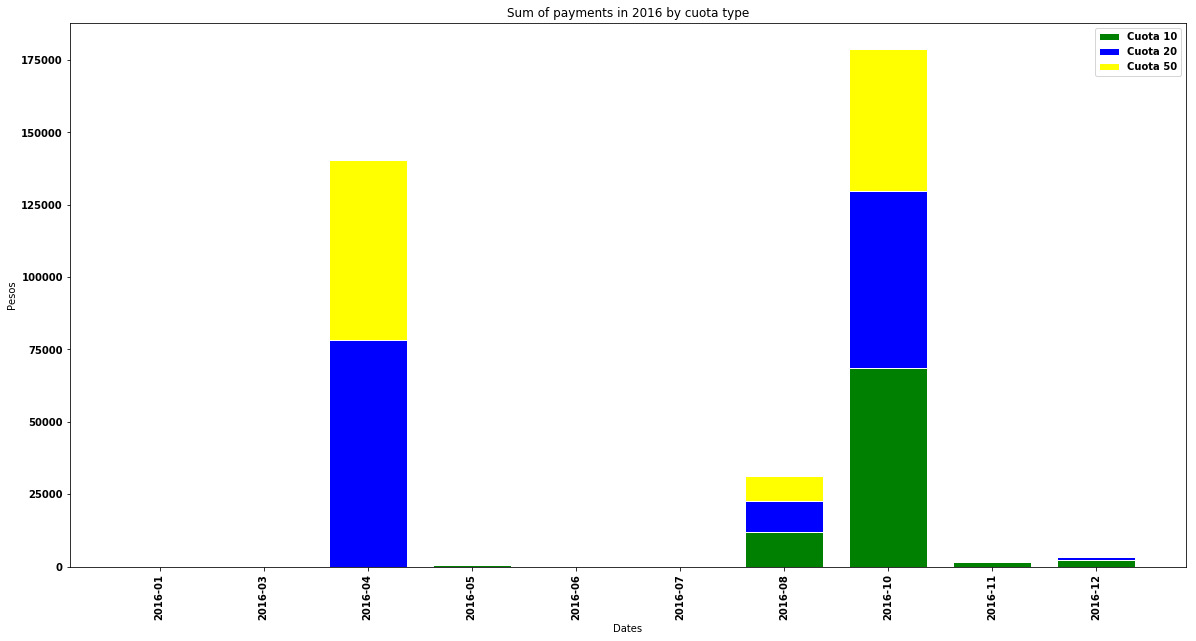

In [11]:
import numpy as np
from matplotlib import rc
 
plt.rcParams['figure.figsize'] = [20, 10]
# y-axis in bold
rc('font', weight='bold')
 
# Names of group and bar width
barWidth = 0.75


# Create red bars bottom
p1 = plt.bar(indx, bar10, color='green', edgecolor='white', width=barWidth)
# Create yellow bars (middle), on top of the firs ones
p2 = plt.bar(indx, bar20, bottom=bar10, color='blue', edgecolor='white', width=barWidth)
# Create blue bars (top)
p3 = plt.bar(indx, bar50, bottom=bar20+bar10, color='yellow', edgecolor='white', width=barWidth)

# label axes
plt.ylabel('Pesos')
plt.xlabel('Dates')
plt.title('Sum of payments in 2016 by cuota type')
# rotate X axis label
plt.xticks(indx, rotation=90)
plt.legend((p1[0], p2[0], p3[0]), ('Cuota 10', 'Cuota 20', 'Cuota 50'))
# Show graphic
plt.show()